# EDA  - Topic modeling (NLP)

<b>Topic modeling<b>

<b>Goal</b>:    
Build a model capable of predicting the topic of a text. 

<b>Bonus</b>: sentiment analysis
    
<b>Difficulty</b>:    
- easy using supervised learning
- medium using LDA (unsupervised learning)
- hard using Word embedding (Word2Vec) and t-SNE

<b>Dataset</b>:<br>
Research papers: use the dataset to predict the topic of a scientific paper using its abstract. First, create a model using the tags (supervised learning). then, try to use unsupervised learning techniques to find topics and compare these topics with the tags of the dataset


In [20]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models, similarities, downloader
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load csv

df_tags = pd.read_csv('data/Tags.csv')
df_test = pd.read_csv('data/Test.csv')
df_train = pd.read_csv('data/Train.csv')
df_sample_sub = pd.read_csv('data/sample_sub.csv')

In [31]:
# all info about data

def all_info(df):
    print("-------------Top-5--------------")
    print(df.head())
    print()
    print("-----------Information-----------")
    print(df.info())
    print()
    print("-----------Data Types-----------")
    print(df.dtypes)
    print()
    print("----------Missing value-----------")
    print(df.isnull().sum())
    print()
    print("----------Null value-----------")
    print(df.isna().sum())
    print()
    print("----------Shape of Data----------")
    print(df.shape)
    print("----------Duplicate----------")
    print(df.duplicated().sum())

In [32]:
# all info about df_tags

all_info(df_tags)

-------------Top-5--------------
                       Tags
0          Analysis of PDEs
1              Applications
2   Artificial Intelligence
3  Astrophysics of Galaxies
4  Computation and Language

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tags    25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes
None

-----------Data Types-----------
Tags    object
dtype: object

----------Missing value-----------
Tags    0
dtype: int64

----------Null value-----------
Tags    0
dtype: int64

----------Shape of Data----------
(25, 1)
----------Duplicate----------
0


In [33]:
# all info about df_sample_sub

all_info(df_sample_sub)

-------------Top-5--------------
      id  Analysis of PDEs  Applications  Artificial Intelligence  \
0   9409                 0             0                        0   
1  17934                 0             0                        0   
2  16071                 0             0                        0   
3  16870                 0             0                        0   
4  10496                 0             0                        0   

   Astrophysics of Galaxies  Computation and Language  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Computer Vision and Pattern Recognition  \
0                                        0   
1                                        0   
2                                        0   
3                        

In [34]:
# all info about df_test

all_info(df_test)

-------------Top-5--------------
      id                                           ABSTRACT  Computer Science  \
0   9409  fundamental frequency (f0) approximation from ...                 0   
1  17934  this large-scale study, consisting of 24.5 mil...                 1   
2  16071  we present a stability analysis of the plane c...                 0   
3  16870  we construct finite time blow-up solutions to ...                 0   
4  10496  planetary nebulae (pne) constitute an importan...                 0   

   Mathematics  Physics  Statistics  
0            0        0           1  
1            0        0           1  
2            0        1           0  
3            1        0           0  
4            0        1           0  

-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id            

In [35]:
# all info about df_train

all_info(df_train)

-------------Top-5--------------
     id                                           ABSTRACT  Computer Science  \
0  1824  a ever-growing datasets inside observational a...                 0   
1  3094  we propose the framework considering optimal $...                 1   
2  8463  nanostructures with open shell transition meta...                 0   
3  2082  stars are self-gravitating fluids inside which...                 0   
4  8687  deep neural perception and control networks ar...                 1   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        1           0                 0             0   
1            0        0           0                 0             0   
2            0        1           0                 0             0   
3            0        1           0                 0             0   
4            0        0           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  ...  

In [36]:
# head of df_sample_sub

df_sample_sub.head()

,id,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,9409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17934,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16071,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16870,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# head of df_tags

df_tags.head()

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language


In [38]:
# head of df_train

df_train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# head of df_test

df_test.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0
3,16870,we construct finite time blow-up solutions to ...,0,1,0,0
4,10496,planetary nebulae (pne) constitute an importan...,0,0,1,0


Nous allons nous concentrer sur le texte à analyser dans le df_train, colonne ABSTRACT

<AxesSubplot:>

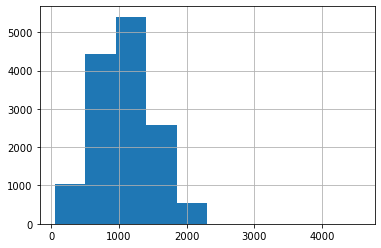

In [4]:
# characters numbers in df_train / ABSTRACT

df_train['ABSTRACT'].str.len().hist()

Les résumés de la colonne 'ABSTRACT' possèdent 10 à 2200 caractères mais plus généralement de 500 à 1600 

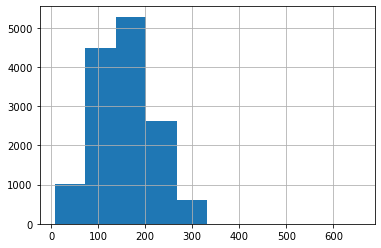

In [5]:
# words numbers in df_train / ABSTRACT

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(df_train['ABSTRACT'])

Le nombre de mots dans chaque résumé est de 10 à 320 environ, mais plus généralement de 70 à 250

<AxesSubplot:>

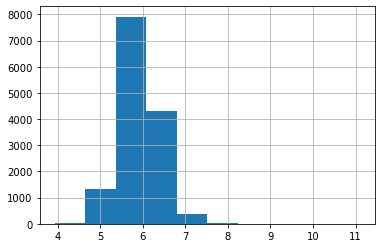

In [6]:
# words's lenght

df_train['ABSTRACT'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

La longueur des mots est de 3 et 8 caractères

In [16]:
# stopwords

# nltk.download('stopwords')

stop=set(stopwords.words('english'))

In [17]:
# creation du corpus

corpus=[]
new= df_train['ABSTRACT'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

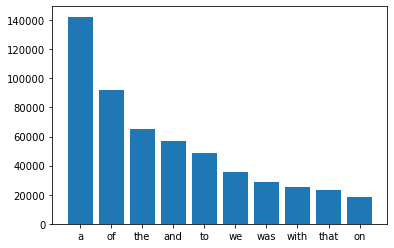

In [18]:
# plot stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(df_train['ABSTRACT'])

Les StopWords les plus fréquents sont :
- a
- of
- the
- and
- to
- we
- was
- with
- that
- on

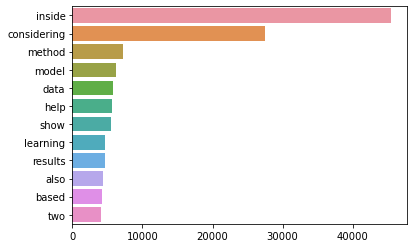

In [19]:
# les mots les plus fréquents, hors stopwords

from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    
plot_top_non_stopwords_barchart(df_train['ABSTRACT'])

Les mots les plus fréquents, hors stopwords sont :
- inside
- considering
- method
- model
- data
- help 
- show
- learning
- results
- also
- based
- two

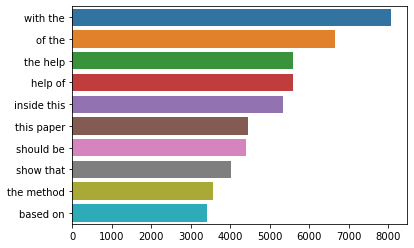

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# ngrams

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
    
# plot bigrams

plot_top_ngrams_barchart(df_train['ABSTRACT'],2)

Les bigrams les plus fréquents sont :
- with the
- of the
- the help
- help of
- inside this
- thiss paper
- sohould be
- show hthat
- the method
- based on

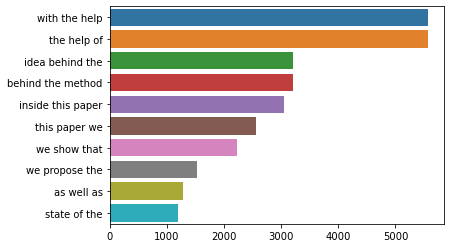

In [18]:
plot_top_ngrams_barchart(df_train['ABSTRACT'],3)

Les trigrams les plus fréquents sont :
- with the ghelp
- the help of
- idea behind me
- inside this paper
- this paper we
- we show that
- we propose the
- as well as
- state of the